# The Healthy Brain Network dataset

![](images/child-mind-institute-hbn-logo.jpg)


A large landmark pediatric mental health study,
- an ongoing initiative collecting MRI and clinical assessment data from 5,000 NYC area adolescents (ages 5-21), at four sites: RU, CBIC, CUNY, SI
- Includes a broad range of psychiatric, behavioral, cognitive, and lifestyle information from both healthy controls and children with a range of disorders.
- openly available on FCP-INDI
    - For further details, see
    Data descriptor: Alexander et al. An open resource for transdiagnostic research in pediatric mental health and learning disorders. Sci Data 4, 170181 (2017).
    Scientific data portal http://fcon_1000.projects.nitrc.org/indi/cmi_healthy_brain_network/index.html

This dataset provides a transdiagnostic resource for research into the development of mental health disorders and learning disabilities. 

- Age, sex, and handedness are publicly available
- All other HBN phenotypic data are protected by a data usage agreement
    - Clinician administered: K-SADS
    - Diagnostic specific assessments for ASD, Speech/Language disorders, intellectual disability, OCD, and tic disorders
    - Intelligence and learning: WIAT, WISC
    - Language: CELF-5, GFTA, CTOPP-2, TOWRE-2, EVT, PPVT
    - Self administered assessments: family structure, behavior, stress, trauma, and substance use
    - Novel data: voice recordings, actigraphy, genetics, deciduous “baby” teeth


One of the datatypes provided through HBN is diffusion MRI data. 

The [HBN POD2 project](https://www.nature.com/articles/s41597-022-01695-7) aims to make this data available in preprocessed and quality controlled format, including tractography and tractometry derivatives.

![](images/sankey.jpg)


The data is navigable via https://fcp-indi.s3.amazonaws.com/index.html

In [1]:
from pathlib import Path

# Make the path object:
cache_path = Path('/home/jovyan/cache')

# Just because we have made a cache path object doesn't mean that the directory
# we made exists; here we check if it exists and make the directory if not.
if not cache_path.exists():
    cache_path.mkdir()


In [2]:
from utils import ls, crawl
import nibabel as nib

In [6]:
from cloudpathlib import S3Path, S3Client

client = S3Client(
    local_cache_dir=cache_path,
    no_sign_request=True)

hbn_base_path = S3Path(
    "s3://fcp-indi/",
    client=client)

In [26]:
hbn_pod2_path = hbn_base_path / "data" / "Projects" / "HBN" / "BIDS_curated" / "derivatives"

In [27]:
import pandas as pd

In [28]:
participants_table = pd.read_csv(hbn_pod2_path / "qsiprep" / "participants.tsv", sep="\t")

In [29]:
participants_table.head()

,subject_id,scan_site_id,sex,age,ehq_total,commercial_use,full_pheno,expert_qc_score,xgb_qc_score,xgb_qsiprep_qc_score,dl_qc_score,site_variant
0,sub-NDARAA306NT2,RU,F,21.216746,6.67,Yes,Yes,NaN,0.850,0.554065,0.470,RU_64dir_Most_Common
1,sub-NDARAA536PTU,SI,M,11.998402,-86.67,No,Yes,NaN,NaN,0.962119,0.701,SI_64dir_Obliquity
2,sub-NDARAA947ZG5,CBIC,M,13.627880,80.00,Yes,Yes,NaN,0.576,0.551769,0.509,CBIC_64dir_Most_Common
3,sub-NDARAA948VFH,RU,F,7.982660,90.00,Yes,Yes,NaN,0.990,0.954094,0.979,RU_64dir_Most_Common
4,sub-NDARAB055BPR,RU,F,10.793862,60.00,Yes,Yes,NaN,0.091,0.040714,0.035,RU_64dir_Most_Common


In [30]:
tract_profiles = pd.read_csv(hbn_pod2_path / "afq" / "sub-NDARAA306NT2" / "ses-HBNsiteRU" / "sub-NDARAA306NT2_ses-HBNsiteRU_acq-64dir_space-T1w_desc-preproc_dwi_space-RASMM_model-CSD_desc-prob-afq_profiles.csv")

Text(0, 0.5, 'FA')

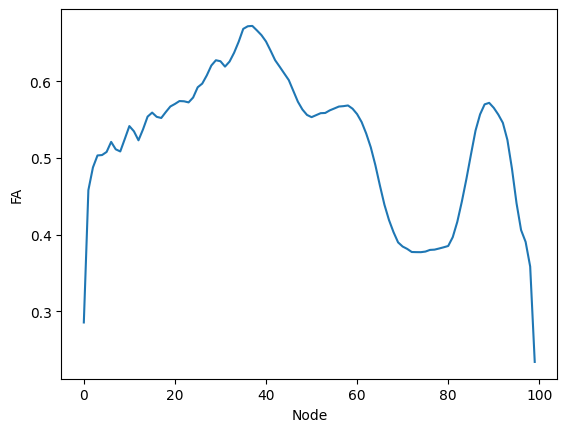

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(tract_profiles[tract_profiles["tractID"] == "CST_L"]["dki_fa"].values)
ax.set_xlabel("Node")
ax.set_ylabel("FA")